# Importazione Librerie

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import os

# Caricamento Dataset e pre-processing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = os.getcwd()
path_dataset = 'drive/MyDrive/Colab Notebooks/Datasets' #insert path

path_ = os.path.join(path, path_dataset, 'diabetes.csv')
data = pd.read_csv(path_)

data.head(10)

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
5          6.6                   85         0  
6          6.5                  200         1  
7          5.7                   85         0  
8          4.8                  145         0  
9          5.0                  100         0

In [4]:
#dummy code smkoing history

data_smoking = pd.get_dummies(data['smoking_history'])
data_smoking = data_smoking.drop(columns=['never', 'ever']) #Use people who have never been smokers as reference. 'ever' is a typo
data_gender = pd.get_dummies(data['gender'])
data_gender = data_gender.drop(columns=['Male']) #Use male as reference
data = pd.concat([data.drop(columns=['smoking_history', 'gender']), data_gender, data_smoking], axis=1)
data = data[data.Other != 1]
data = data.drop(columns=['No Info', 'not current', 'Other']) # Remove Other because only 18 people had thi

In [5]:
data

age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  diabetes  Female  current  former  
0                      140         0    True    False   False  
1                       80         0    True    False   False  
2                      158         0   False    False   False  
3                      155         0    True     True   False  
4                      155         0   False     True   False  
...                    ...       ...     ...      ...     ...  
99995                   90         0    True    False   False  
99996                  100         0    True    False   False  
99997                  155         0   False    False    True  
99998                  100         0    True    False   False  
99999                   90         0    True     True   False  

[99982 rows x 10 columns]

In [6]:
#Get information about the columns
print(data.info())

#Check for null values
print('Are there any null values?: ', data.isnull().values.any())
print('Are there duplicate values?: ', data.duplicated())
print('Sum of null values: ', data.isnull().sum())
print('Sum of duplicated values :', data.duplicated().sum())

#Get descriptive statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  99982 non-null  float64
 1   hypertension         99982 non-null  int64  
 2   heart_disease        99982 non-null  int64  
 3   bmi                  99982 non-null  float64
 4   HbA1c_level          99982 non-null  float64
 5   blood_glucose_level  99982 non-null  int64  
 6   diabetes             99982 non-null  int64  
 7   Female               99982 non-null  bool   
 8   current              99982 non-null  bool   
 9   former               99982 non-null  bool   
dtypes: bool(3), float64(3), int64(4)
memory usage: 6.4 MB
None
Are there any null values?:  False
Are there duplicate values?:  0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Le

Osserviamo che, dalle statistiche descrittive, nel dataset l'individuo medio è in sovrappreso (bmi medio >25.0), molto vicino ad essere pre-diabetico e/o ha il diabete (livelli medi HbA1C < 5.7, dove livelli maggiori di 5.7 indicano il pre-diabete. livelli medi blood glucose > 126 mg/dL indicano diabete). Si noti che il dataset non menziona se i livelli di glicemia a digiuno (fasting blood sugar levels) siano o meno presenti. Tuttavia, i livelli di glicemia sono solitamente a digiuno, quindi presumiamo che sia così anche in questo caso. Variabili come ipertensione, malattie cardiache e diabete sono in realtà variabili categoriali, in quanto hanno valori pari a 0 e 1.

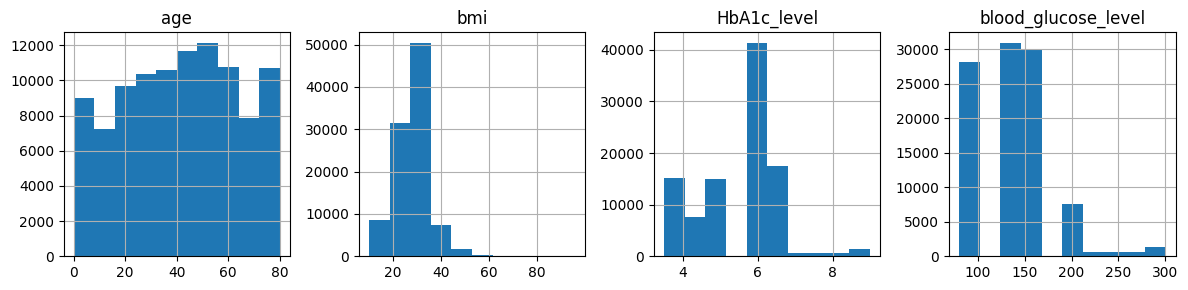

In [17]:
#Plot histograms of continuous variables to visualize the distribution
fig, ax = plt.subplots(1, 4, figsize=(12, 3))  # 1 riga, 4 colonne
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for i in range(4):
    data.hist(column=cols[i], ax=ax[i])

plt.tight_layout()
plt.show()

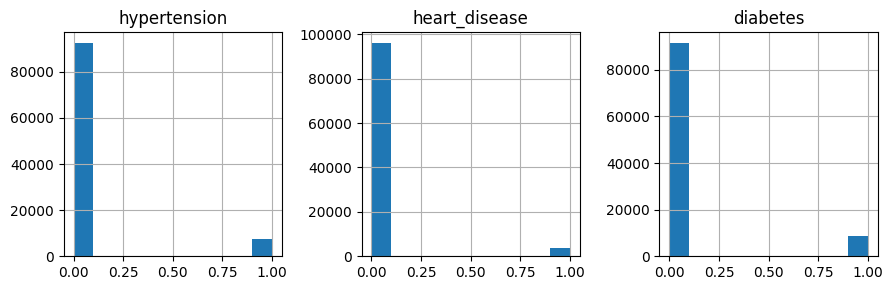

In [18]:
#Plot categorical variables
fig, ax = plt.subplots(1, 3, figsize=(9, 3))  # 1 riga, 3 colonne, immagini più piccole
cols = ['hypertension', 'heart_disease', 'diabetes']

for i in range(3):
    data.hist(column=cols[i], ax=ax[i])

plt.tight_layout()
plt.show()

<Axes: >

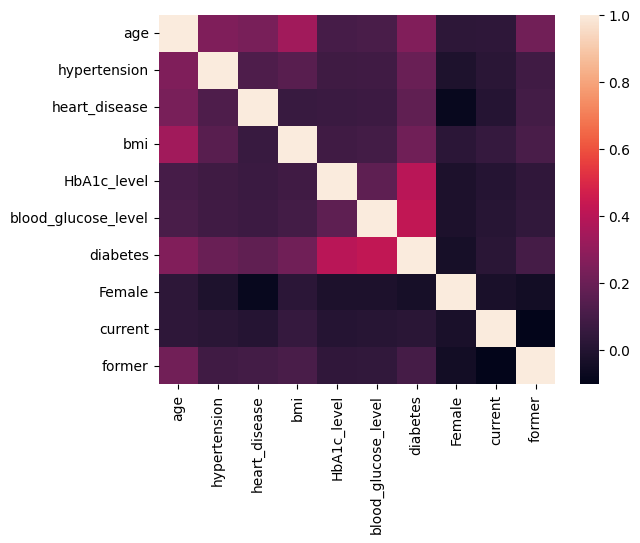

In [19]:
#Correlation plot
sns.heatmap(data.corr())

Dall'heatmap, osserviamo che la correlazione più forte è tra diabetes e blood sugar levels e HvA1C levels, il che non sorprende. Il diabete è in qualche modo correlato a hypertension, heart disease , age e bmi, e non più di tanto a smoking history.

In [20]:
X = data.drop(columns=['diabetes'])
y = data['diabetes']

#Split data into training (66%) and test (33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#**Decision Tree**

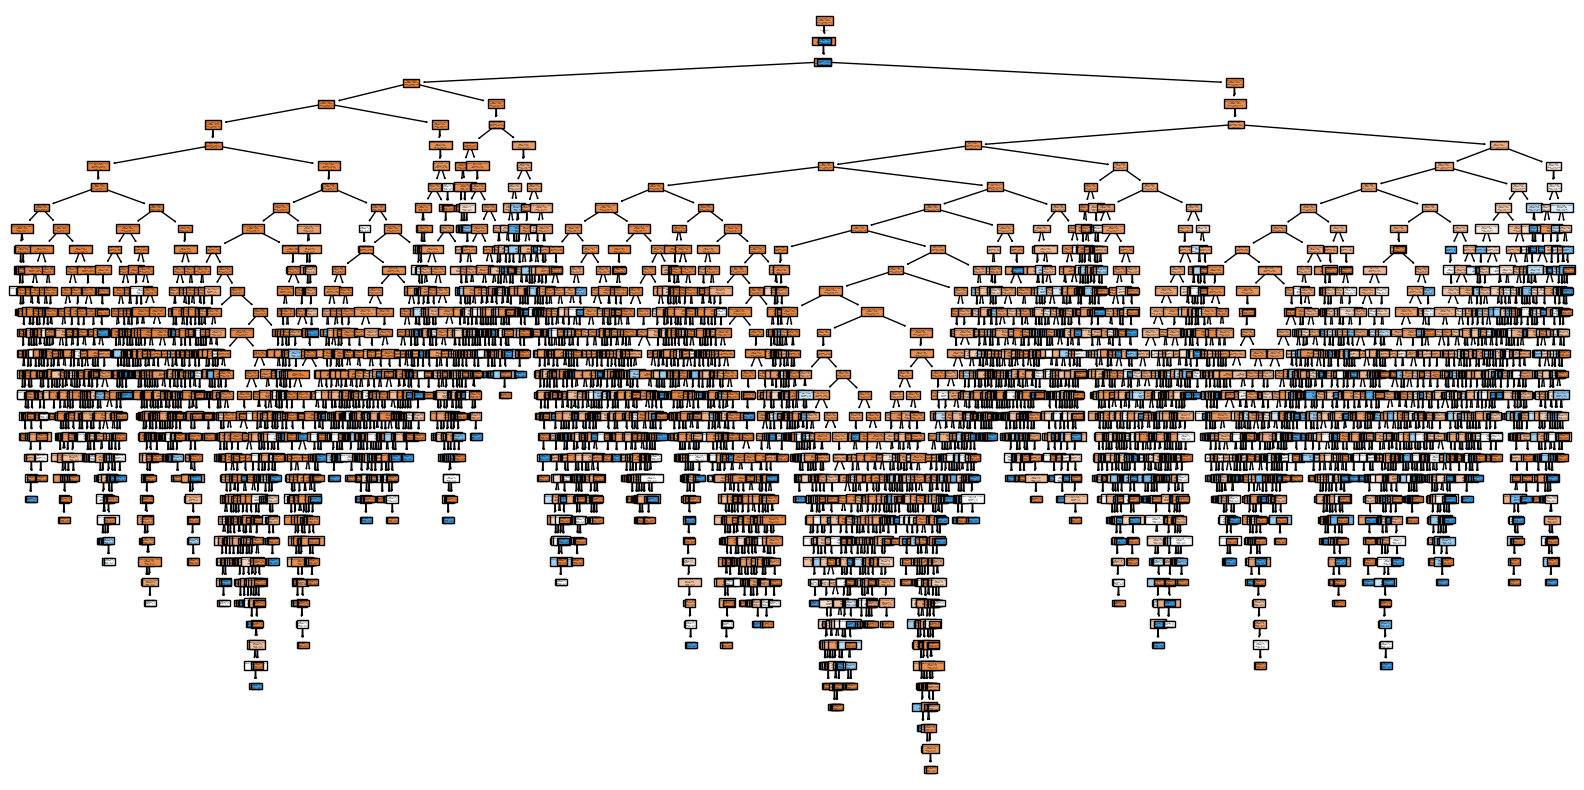

In [40]:
from sklearn import tree

# define the model
model = tree.DecisionTreeClassifier()

# fit the model
model.fit(X_train, y_train)


plt.figure(figsize=(20, 10))  # imposta dimensioni del grafico
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [ ]:
"""
Text(0.5175985438422946, 0.9864864864864865, 'x[4] <= 6.7\ngini = 0.154\nsamples = 66987\nvalue = [61352, 5635]') significa che :
- x[4] <= 6.7 :  La condizione usata per dividere i dati in quel nodo (la quinta feature è ≤ 6.7).
- gini = 0.154 : l’indice di Gini (una misura di impurità: 0 = puro, 0.5 = massimo disordine).
- samples = 66987 : Numero di campioni in quel nodo.
- value = [61352, 5635] : Quanti esempi appartengono a ciascuna classe (es. classe 0 = 61352, classe 1 = 5635).
"""

In [22]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names= X_train.columns,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)


In [23]:
graph

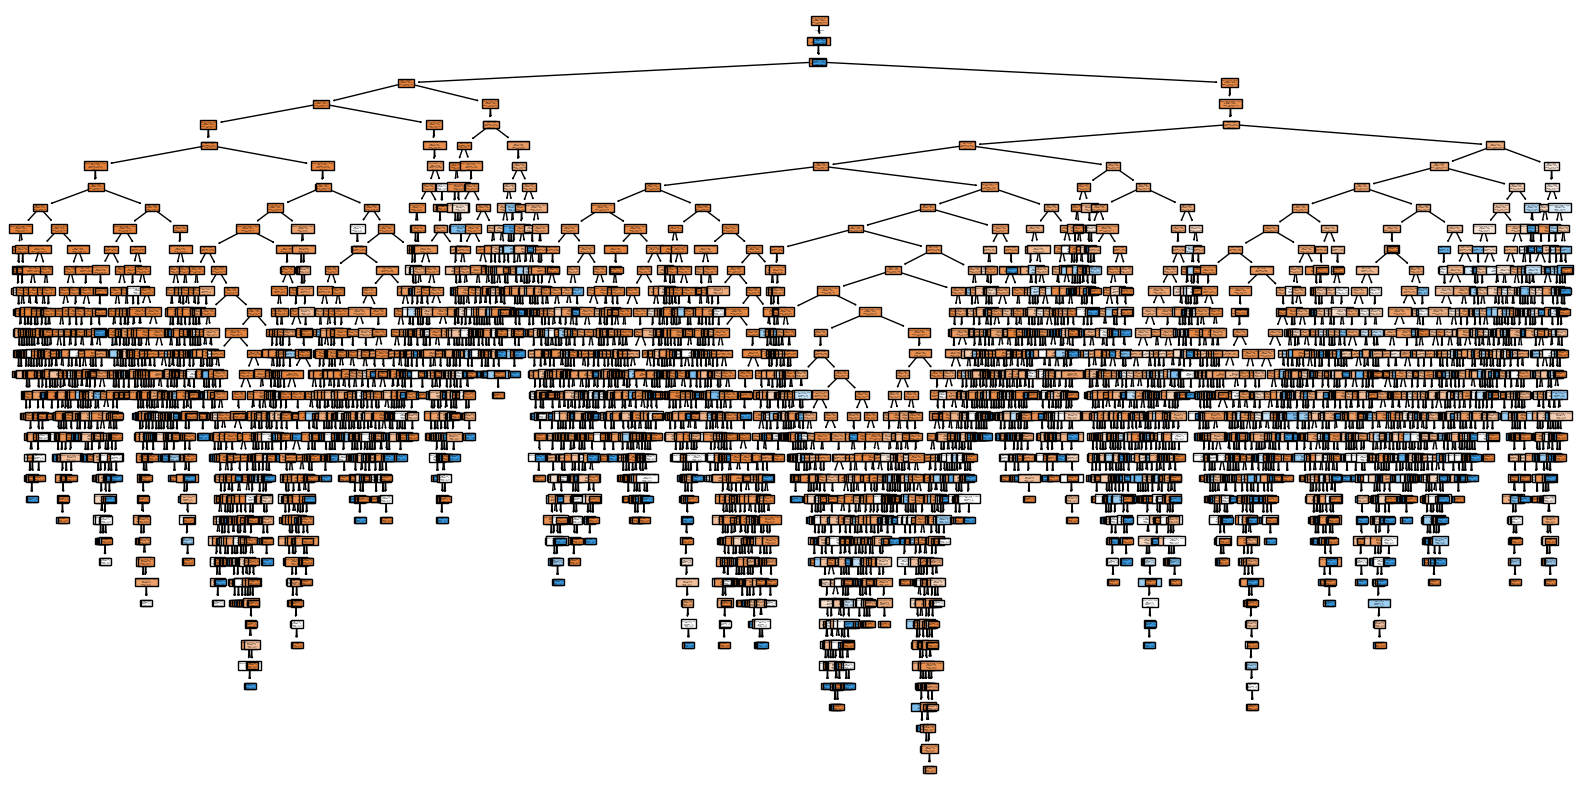

In [26]:
plt.figure(figsize=(20, 10))  # imposta dimensioni del grafico
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

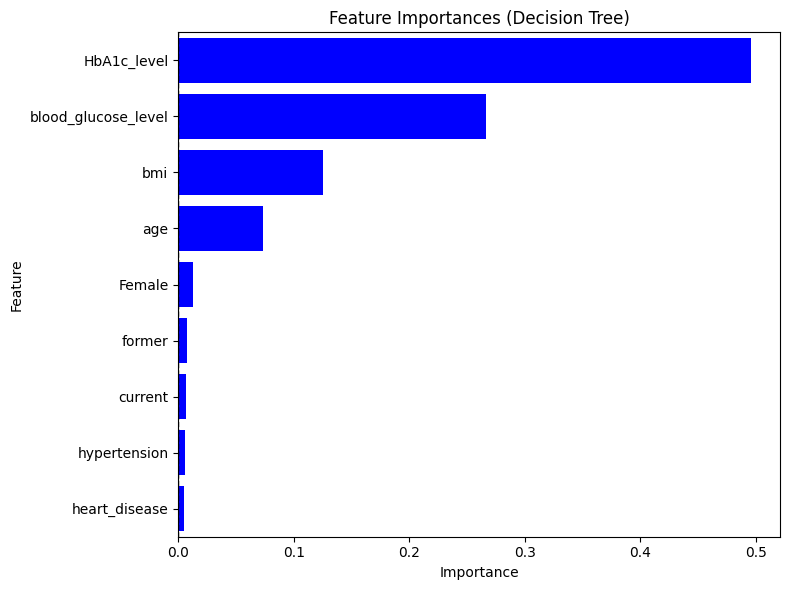

In [35]:
# Compute feature importance
importance = model.feature_importances_

# Create and sort DataFrame
coef_df = pd.DataFrame({'coef': importance,
                        'varname': X_train.columns})
coef_df = coef_df.sort_values(by='coef', ascending=False).iloc[::-1]  # Inverti l'ordine per barh

# Plot horizontal bar chart
coef_df.plot(y='coef', x='varname', kind='barh', color='none',
             legend=False, figsize=(8, 6))

plt.barh(coef_df['varname'], coef_df['coef'], color='blue')
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [25]:
y_pred = model.predict(X_test)
print('Model accuracy: ', model.score(X_test, y_test)*100)

Model accuracy:  95.00530383391424


#**Decision Tree: Max-depth = 2**

[Text(0.6, 0.8333333333333334, 'x[4] <= 6.7\ngini = 0.154\nsamples = 66987\nvalue = [61352, 5635]'),
 Text(0.4, 0.5, 'x[5] <= 210.0\ngini = 0.09\nsamples = 64379\nvalue = [61352, 3027]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.057\nsamples = 63217\nvalue = [61352, 1865]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1162\nvalue = [0, 1162]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2608\nvalue = [0, 2608]'),
 Text(0.7, 0.6666666666666667, '  False')]

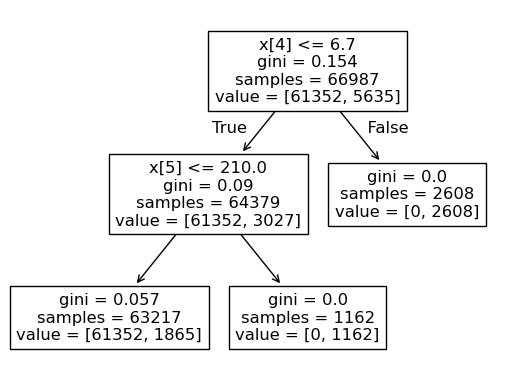

In [36]:
# define the model
model = tree.DecisionTreeClassifier(max_depth = 2)
# fit the model
model.fit(X_train, y_train)
tree.plot_tree(model)

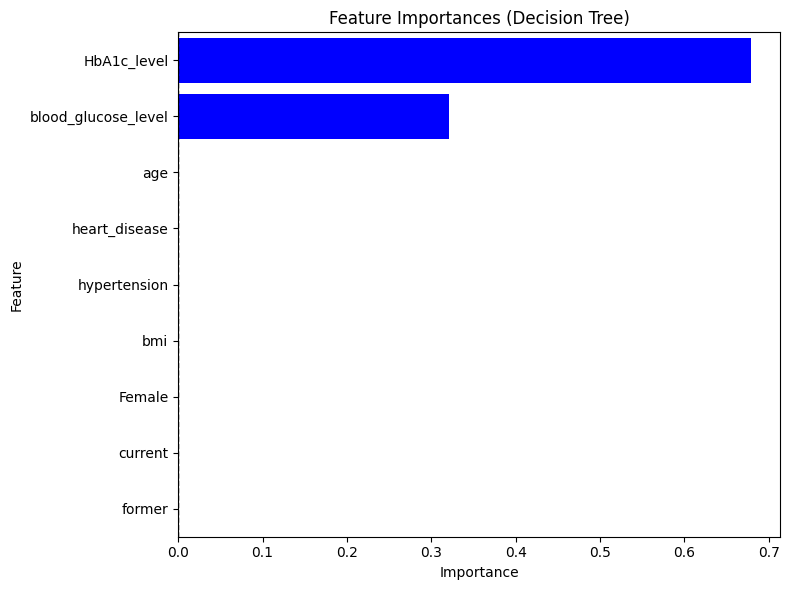

In [38]:
# Compute feature importance
importance = model.feature_importances_

# Create and sort DataFrame
coef_df = pd.DataFrame({'coef': importance,
                        'varname': X_train.columns})
coef_df = coef_df.sort_values(by='coef', ascending=False).iloc[::-1]  # Inverti l'ordine per barh

# Plot horizontal bar chart
coef_df.plot(y='coef', x='varname', kind='barh', color='none',
             legend=False, figsize=(8, 6))

plt.barh(coef_df['varname'], coef_df['coef'], color='blue')
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)
plt.title("Feature Importances (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [39]:
y_pred = model.predict(X_test)
print('Model accuracy: ', model.score(X_test, y_test)*100)

Model accuracy:  97.126837399606
